# STAT207 Final Project - INSERT TITLE HERE



**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings("ignore", category=PerfectSeparationWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## 1. Introduction

The primary research goal for our final project is to build a predictive model that effectively predicts if a game is worth playing or not in new datasets.

The secondary research goal for our final project is to see which model will yield the most reliable, interpretative insights about the nature of the relationship between the variables in this game dataset.

Our final project aims to analyze the video game dataset that was provided to us by Dr. Ellison. The motivation for building a predictive model that classifies games based on review scores lies in its utility for various stakeholders in the gaming industry. Game developers, publishers, and marketers can greatly benefit from predicting how well a game might be received. Understanding the potential of a game before it has been released could guide improvements and marketing strategies to help maximize critical success. We chose to look at 5 explanatory variables; these include: "Features.Max Players," "Metrics.Review Score," "Metrics.Sales," "Metrics.Used Price," "Release.Console," "Length.All PlayStyles.Average." These stakeholders are particularly interested in ensuring their games receive positive reviews, as high scores often correlate with better sales and stronger brand reputation. Predictive insights into the factors influencing review scores could motivate more focused development efforts. Ars Technica's Kyle Orland says, "that yes, for the most part, higher-rated games tend to get better sales" (Yoon). This insight is important because it highlights the direct impact of game quality on commercial success. If developers understand that higher review scores can lead to better sales, they are more likely to invest in quality game design, thorough testing, and innovative features that can elevate the game's ratings.

Beyond aiming for high review scores, there are other motivations for game developers when considering the use of predictive models. The high cost of creating a new video game is another significant motivation for using predictive models that effectively predict review scores. Developing a video game involves substantial financial investment, with costs often running from, "$20k to $5 million, depending on how large and complex the game is and how long it takes to make it" (Lim, 2023). This investment covers aspects like design, development, marketing, and distribution. Given these high stakes, it is very important for developers and publishers to maximize the probability of a high review rating game so that more gamers would want to invest their time in playing. This model can help in assessing the potential success or failure based on review ratings of a game before significant resources are committed.

For a game developer, the decision on whether to focus more on classifying "positives" (games predicted to score highly) versus "negatives" (games predicted to score poorly) can significantly impact the business outcome. This individual would be interested in achieving high accuracy for identifying "positives." If the model primarily excelled at recognizing "negatives," it might overlook games that could have been successful but the model predicted to be a miss (false positive). This misclassification could lead to missed opportunities, underfunding promising projects, or misdirecting marketing efforts, all of which could stifle potential revenue and growth. Once again, since games are expensive, if gamers prioritize review scores, and accidentally, this model gives them a false positive, the player/gamer would end up missing this opportunity of playing a good game. Ensuring a high probability of classifying true negatives (classifier of 0) would help this individual more. By effectively pinpointing games likely to receive low scores, the developer can prevent significant financial and reputational losses associated with launching a poorly received title. Although this strategy is defensively oriented, it safeguards the firm from costly failures. However, if a predictive model overemphasizes "negatives," it risks being overly cautious, potentially leading to the shelving of projects that, while not guaranteed blockbusters, could have been moderately successful. Ideally, the most beneficial scenario for a game developer would be a classifier that maintains equally high accuracy for both "positives" and "negatives." This balanced accuracy ensures that developers are not only avoiding investment in likely failures but are also confidently investing in and prioritizing projects with the highest potential for success.

## 2. Dataset Discussion

We obtained this dataset from Dr.Ellison, who downloaded this dataset on September 8th, 2023. It has 1,212 rows at the moment before any cleaning has been done. This data was originally collected by Dr.Joe Cox, for games between 2004 and 2010, tracking mutiple statical variables for many games. For this project, we specifically focuses on these six variables: "Features.Max Players" "Metrics.Review Score"	"Metrics.Sales"	"Metrics.Used Price"	"Release.Console". From a quick glance, this dataset seems to have a diverse set of observations (columns) needed to answer our research questions.The Max Players variable ranges from 1-8, there is a variety of video games Ratings from E for Everyone to M for Mature, the Review Scores values range between 0-100 (no extrapolation), and the Price and Sales variables are within a reasonable range, and there are many popular consoles taken into consideration (many consoles which people purchase since they are so popular). Taking that into consideration, devlopers/publishers who are interested in this research will have a large variety of video games from different consoles to choose from, depending on what their specific criteria is. 

Features.Max Players-The maximum number of players that can play this game.	

Sales - the overall sales for the game in millions of dollars (USD).

Metrics.Review Score-a typical review score for this game, out of 100.	


Metrics.Used Price-A typical "used" price for this game (i.e. previously returned and sold), measured in dollars. It is unclear where this number originally came from.

Release.Console-The name of the console that this particular game was released for. Note that the dataset contains multiple copies of the same game, released for different consoles.	


These five variables are likely strong predictors of whether a game will receive a high or low review score. Analyzing review scores can provide valuable insights for developers and publishers, as games with high scores tend to attract more players. Sales figures reflect the game's popularity and profitability, suggesting that players often invest in games that are well-rated. The average length of all play styles indicates the game's engagement level; longer gameplay might imply that players enjoy the game more. The console variable can help developers determine if there's a relationship between the platform a game is available on and its success. Finally, the used price provides insights into the affordability of highly-rated games compared to those with lower scores, which can influence consumer choices and perceptions.

In [2]:
df=pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
len(df)

1212

## 3. Dataset Cleaning


We first subset the original dataset to only containing the explanatory and response variables we want to use to answer our primary and secondary research question.

To make our dataset more comprehensive for others to understand, we changed the names of the columns to simpler names. We created new columns and inputted all the values from the column with a bit complicated names. After doing so, we deleted the column with the complicated name using the parameter axis = 1 to avoid duplicated data. We did this for all five variables. In part 4, we converted the Features Player column into a binary categorical response variable (turning into True 1 and False 0 values).

#### Explicit Missing Values

There are no explicit missing values since we still have the same number of rows as before dropping.

#### Implicit Missing Values

 We checked for implicit missing values by using the .dtypes function. After importing the dataset into Python and conducting through exploratory data analysis, I concluded that the dataset is already cleaned and does not require further cleaning to enhance its suitability for achieveing my research goals. Firstly, I examined the dataset to identify any explicit missing values recognized as NaN by Python, utilizing the isna().sum() function. Across all variables, there were no values identified as NaN, indicating that there are no explicit missing values. Next, I assessed the data types of each variable using df.dtypes to ensure that the variable aligns with their respective types. For instance, Release_Console should be represented as objects while maxplayer should ideally be int 64. Upon reviewing the data types, I confirmed that there were no implicit missing values present. To conclude, the dataset appears to be thoroughly cleaned and ready for further analysis, demonstrating consistency with the desired data types and no missing values.

 The beneift of using the dtypes function for implicit cleaning is, it quickly reveals the data types in each column, helping detect columns that might hold implicit missing values represented in non-standard formats. Meanwhile, isna().sum() effectively counts these missing values, making it easier to assess the completeness of the data. However,  it can be computationally intensive on large datasets and may not automatically recognize all types of implicit missing values, such as those masked as incorrect data types like "?".

 

#### Outliers
After utilizing a set of functions, we dropped 253 rows due to outliers for all other cleaning. After creating five boxplots for our numerical variables, we saw numerous outliers for three of our variables: "price," "sales," and "length." We first decided to drop outliers in Price that are above 30 (millions) because we think some points are too far from the rest of the values and it could affect the mean and cause problems in analyzing in the future. We also dropped values greater than 6 for sales for the same reason. However, for length average, we dropped any values that are 0 (minutes). It just means the player didn't even enter the game and gave a false rating. The ratings given by those players are just meaningless and may mess up our predictions. The benefit of dropping these outliers would be our statistical calculations like the mean would not be skewed and these values maybe inputted on accident but on the other hand, it after dropping, the dataset is no longer representative of the entire dataset if these outliers are inputted on purpose. We decided to keep ReviewScore and Maxplayers the same because for maxplayers it could only be 1 player or more. It does not really affect our analysis in the future since there's no suspicious large values or values below 1. It is also possible to have some really low review score for games or high as long as it is within the range of 0-100.

In [4]:
ds = df[["Features.Max Players","Metrics.Review Score", "Metrics.Sales", "Metrics.Used Price", "Release.Console", "Length.All PlayStyles.Average"]]
ds.head()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Length.All PlayStyles.Average
0,1,85,4.69,24.95,Nintendo DS,22.716667
1,1,89,0.56,14.95,Sony PSP,10.100000
2,2,81,0.54,22.95,Nintendo DS,4.566667
3,1,81,0.49,12.95,Sony PSP,0.000000
4,1,61,0.45,14.95,Nintendo DS,13.250000


In [5]:
ds["Score"] = ds["Metrics.Review Score"]
ds = ds.drop("Metrics.Review Score", axis = 1)

/var/folders/6w/n57v9fbx4r10_1xj3b15_0800000gn/T/ipykernel_32554/3990314167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Score"] = ds["Metrics.Review Score"]


In [6]:
ds["Sales"] = ds["Metrics.Sales"]
ds = ds.drop("Metrics.Sales", axis = 1)

In [7]:
ds["Price"] = ds["Metrics.Used Price"]
ds = ds.drop("Metrics.Used Price", axis = 1)

In [8]:
ds["Length_average"] = ds["Length.All PlayStyles.Average"]
ds = ds.drop("Length.All PlayStyles.Average", axis = 1)

In [9]:
ds["Maxplayers"] = ds["Features.Max Players"]
ds = ds.drop("Features.Max Players", axis = 1)

In [10]:
ds["Release_Console"] = ds["Release.Console"]
ds = ds.drop("Release.Console", axis = 1)

In [11]:
ds=ds.dropna()
ds

,Score,Sales,Price,Length_average,Maxplayers,Release_Console
0,85,4.69,24.95,22.716667,1,Nintendo DS
1,89,0.56,14.95,10.100000,1,Sony PSP
2,81,0.54,22.95,4.566667,2,Nintendo DS
3,81,0.49,12.95,0.000000,1,Sony PSP
4,61,0.45,14.95,13.250000,1,Nintendo DS
...,...,...,...,...,...,...
1207,71,0.03,17.95,10.083333,1,Nintendo DS
1208,62,0.03,17.95,0.000000,1,Sony PSP
1209,51,0.03,15.95,0.000000,1,PlayStation 3
1210,64,0.02,17.95,10.083333,2,Nintendo Wii


In [12]:
ds.dtypes

Score                int64
Sales              float64
Price              float64
Length_average     float64
Maxplayers           int64
Release_Console     object
dtype: object

In [13]:
ds.isna().sum()

Score              0
Sales              0
Price              0
Length_average     0
Maxplayers         0
Release_Console    0
dtype: int64

<Axes: >

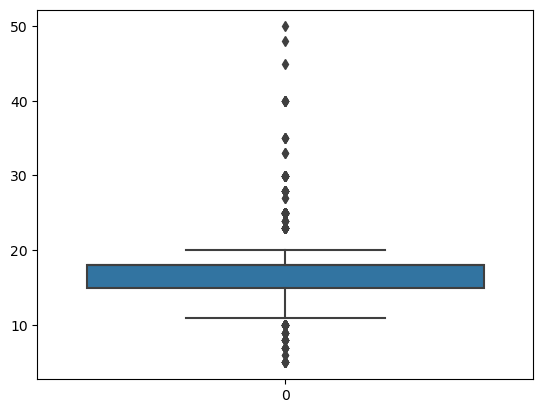

In [14]:
sns.boxplot(ds.Price,orient="y")

<Axes: >

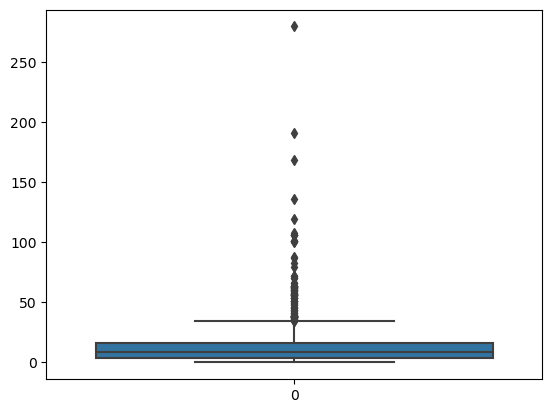

In [15]:
sns.boxplot(ds.Length_average,orient="y")

<Axes: >

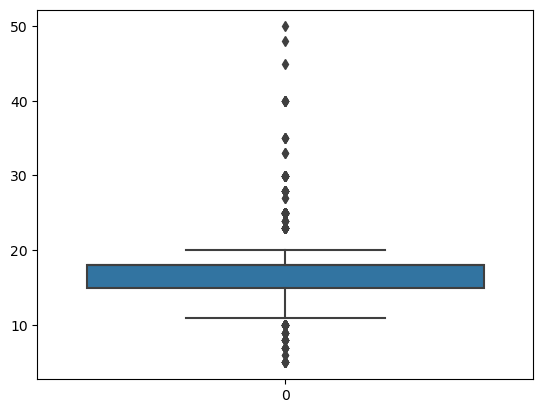

In [16]:
sns.boxplot(ds.Price,orient="y")

<Axes: >

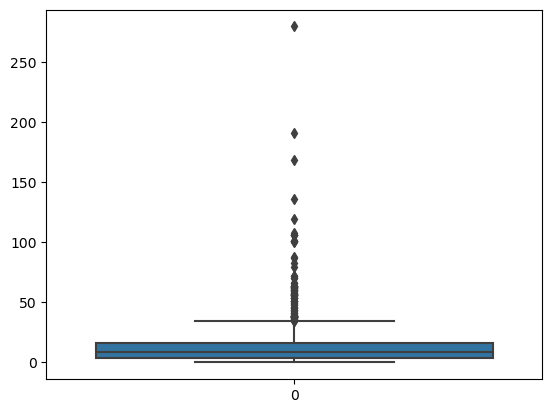

In [17]:
sns.boxplot(ds.Length_average,orient="y")

In [18]:
ds.Length_average.min()

0.0

<Axes: >

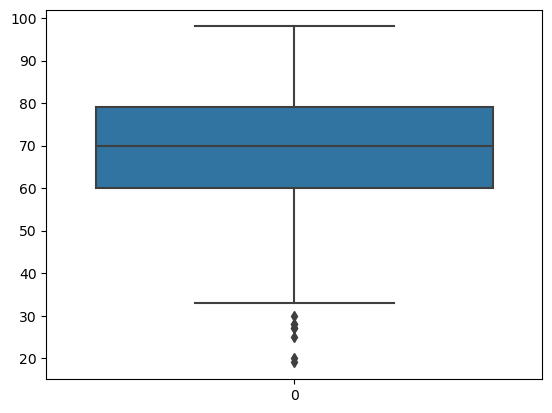

In [19]:
sns.boxplot(ds.Score,orient="y")

<Axes: >

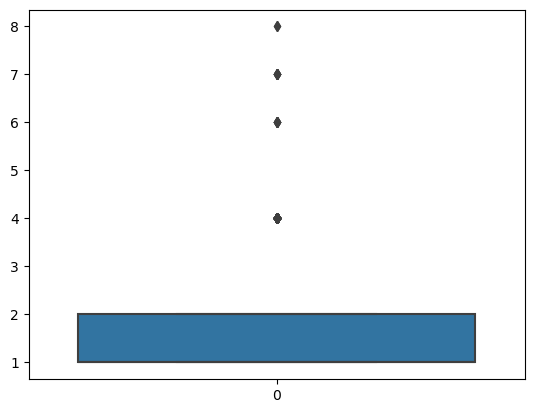

In [20]:
sns.boxplot(ds.Maxplayers,orient="y")

<Axes: >

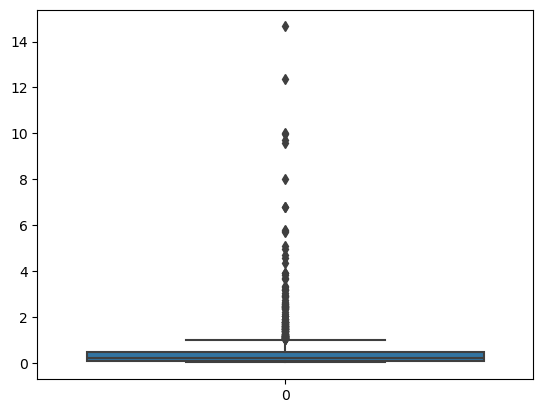

In [21]:
sns.boxplot(ds.Sales,orient="y")

/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

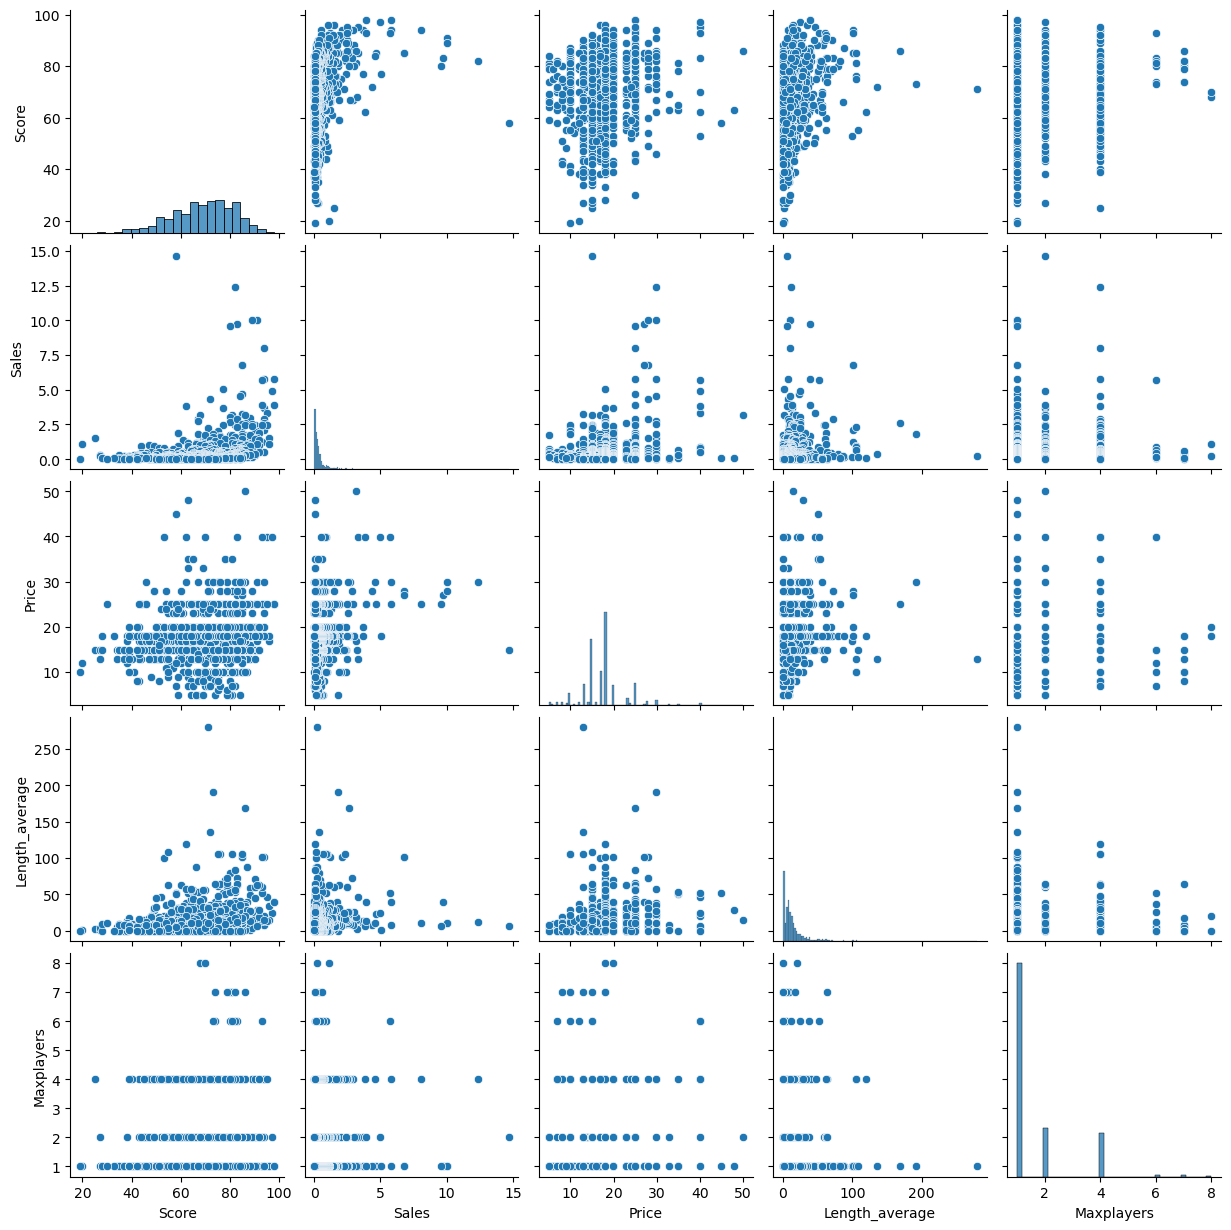

In [22]:
sns.pairplot(ds)

In [23]:
ds=ds[(ds.Sales<6) & (ds.Price<30)]
len(ds)

1187

In [24]:
ds=ds[ds.Length_average>0]
ds.head()

,Score,Sales,Price,Length_average,Maxplayers,Release_Console
0,85,4.69,24.95,22.716667,1,Nintendo DS
1,89,0.56,14.95,10.100000,1,Sony PSP
2,81,0.54,22.95,4.566667,2,Nintendo DS
4,61,0.45,14.95,13.250000,1,Nintendo DS
5,67,0.41,12.95,21.933333,1,Nintendo DS


In [25]:
len(ds)

959

In [26]:
len(df)-len(ds)

253

## 4. Preliminary Analysis

To facilitate our analysis in predicting the review score of video games, we transformed the "Score" column into a binary variable named "Worth-Playing". In this conversion, games with a score greater than 60 were assigned a value of 1, and those with a player count less than 60 were assigned a value of 0.

We conducted a series of visual analysis to understand the relationship between "Score" variable and each of the explanatory variables: "Maxplayer", "Sales", "Price", Length_average", "Release_Console". Box plots were utilized to observe their distribution across the "worth playing" categories. For categorical variables ("console"). We used barplots to assess the proportion of games across different categories.These visualizations are important in identifying which variables might have a significant influence on whether a game is worth playing or not.

To further our analysis, we explored the associations between each pairs of our explanatory variables. This step is important to identify any potential multicollinearity or strong correlations that might exist between these variables. For numerical variable pairs, we used scatterplots  to visualize their relationships. For categorical variables or mixed pairs (one categorical and one numerical), we used bar plots. These insights can help in understanding the interdependencies between variables and refining our predictive model.


In [27]:
ds["worth_playing"]=ds["Score"]>75
ds.head()

,Score,Sales,Price,Length_average,Maxplayers,Release_Console,worth_playing
0,85,4.69,24.95,22.716667,1,Nintendo DS,True
1,89,0.56,14.95,10.100000,1,Sony PSP,True
2,81,0.54,22.95,4.566667,2,Nintendo DS,True
4,61,0.45,14.95,13.250000,1,Nintendo DS,False
5,67,0.41,12.95,21.933333,1,Nintendo DS,False


In [28]:
len(ds[ds.worth_playing==1])

338

In [29]:
ds['worth_playing'] = ds['worth_playing'].replace({True: 1, False: 0})
ds=ds.drop("Score", axis = 1)
ds.head()

,Sales,Price,Length_average,Maxplayers,Release_Console,worth_playing
0,4.69,24.95,22.716667,1,Nintendo DS,1
1,0.56,14.95,10.100000,1,Sony PSP,1
2,0.54,22.95,4.566667,2,Nintendo DS,1
4,0.45,14.95,13.250000,1,Nintendo DS,0
5,0.41,12.95,21.933333,1,Nintendo DS,0


<Axes: xlabel='worth_playing', ylabel='Price'>

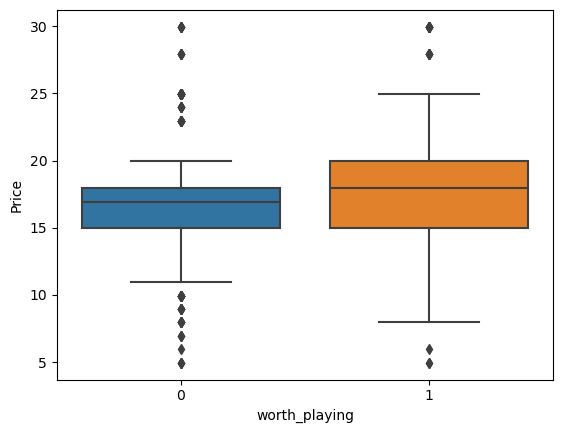

In [30]:
sns.boxplot(x="worth_playing",y="Price",data=ds)

<Axes: xlabel='worth_playing', ylabel='Length_average'>

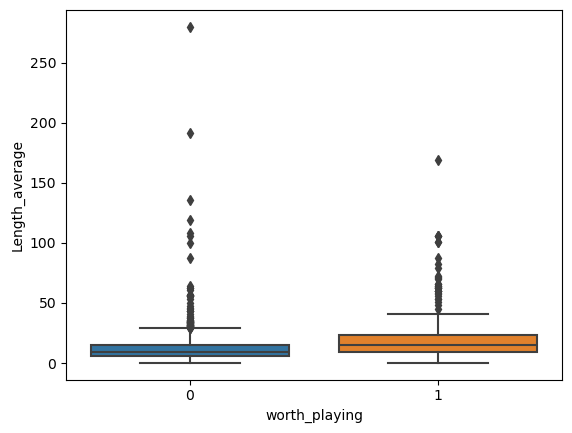

In [31]:
sns.boxplot(x="worth_playing",y="Length_average",data=ds)

<Axes: xlabel='worth_playing', ylabel='Maxplayers'>

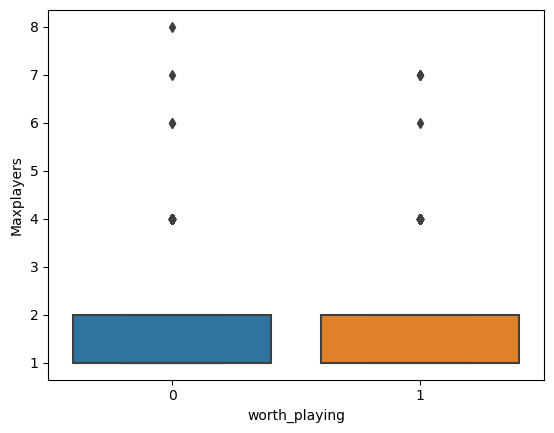

In [32]:
sns.boxplot(x="worth_playing",y="Maxplayers",data=ds)

<Axes: xlabel='worth_playing', ylabel='Sales'>

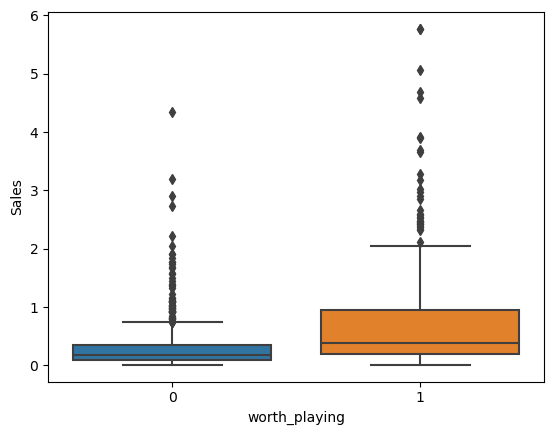

In [33]:
sns.boxplot(x="worth_playing",y="Sales",data=ds)

<Axes: xlabel='Release_Console'>

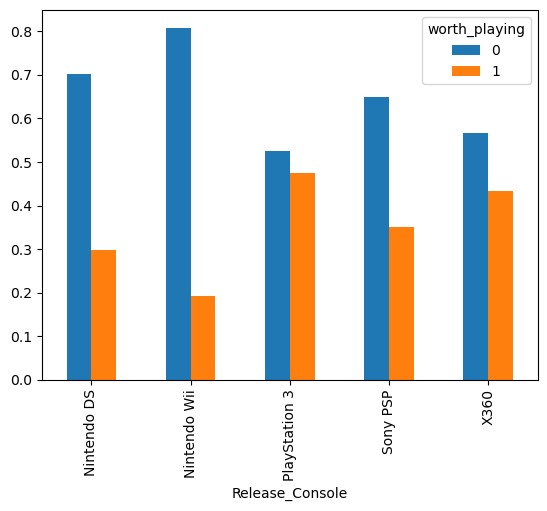

In [34]:
temp=pd.crosstab(ds["Release_Console"],ds["worth_playing"],normalize='index')
temp.plot.bar()

<Axes: xlabel='worth_playing', ylabel='Sales'>

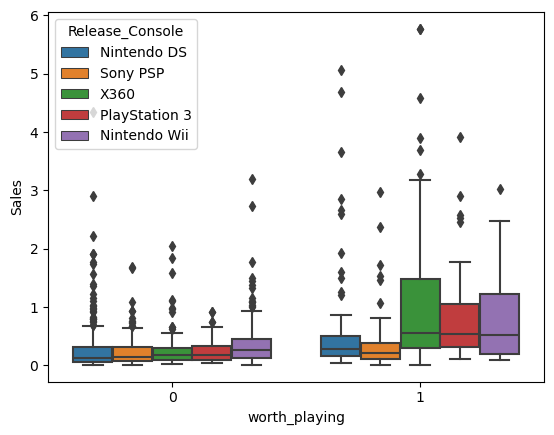

In [35]:
sns.boxplot(x="worth_playing",y="Sales",hue="Release_Console",data=ds)

<Axes: xlabel='worth_playing', ylabel='Price'>

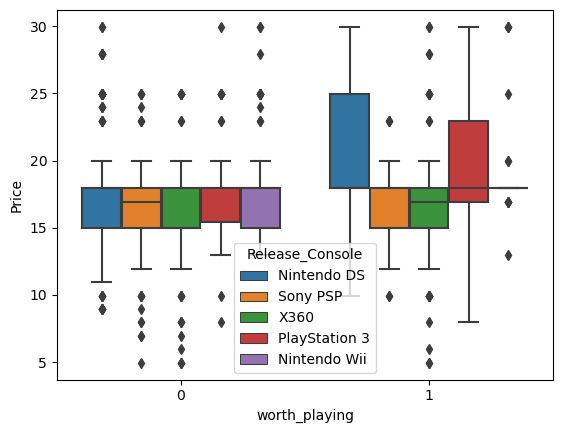

In [36]:
sns.boxplot(x="worth_playing",y="Price",hue="Release_Console",data=ds)

<Axes: xlabel='worth_playing', ylabel='Length_average'>

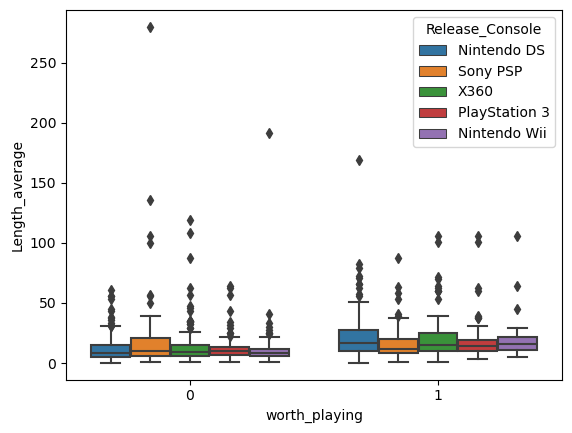

In [37]:
sns.boxplot(x="worth_playing",y="Length_average",hue="Release_Console",data=ds)

<Axes: xlabel='worth_playing', ylabel='Maxplayers'>

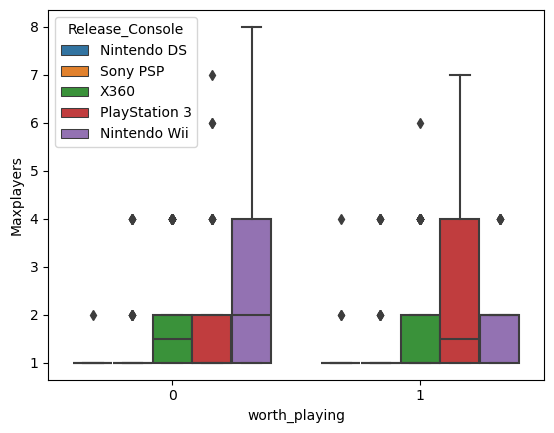

In [38]:
sns.boxplot(x="worth_playing",y="Maxplayers",hue="Release_Console",data=ds)

/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/victor/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

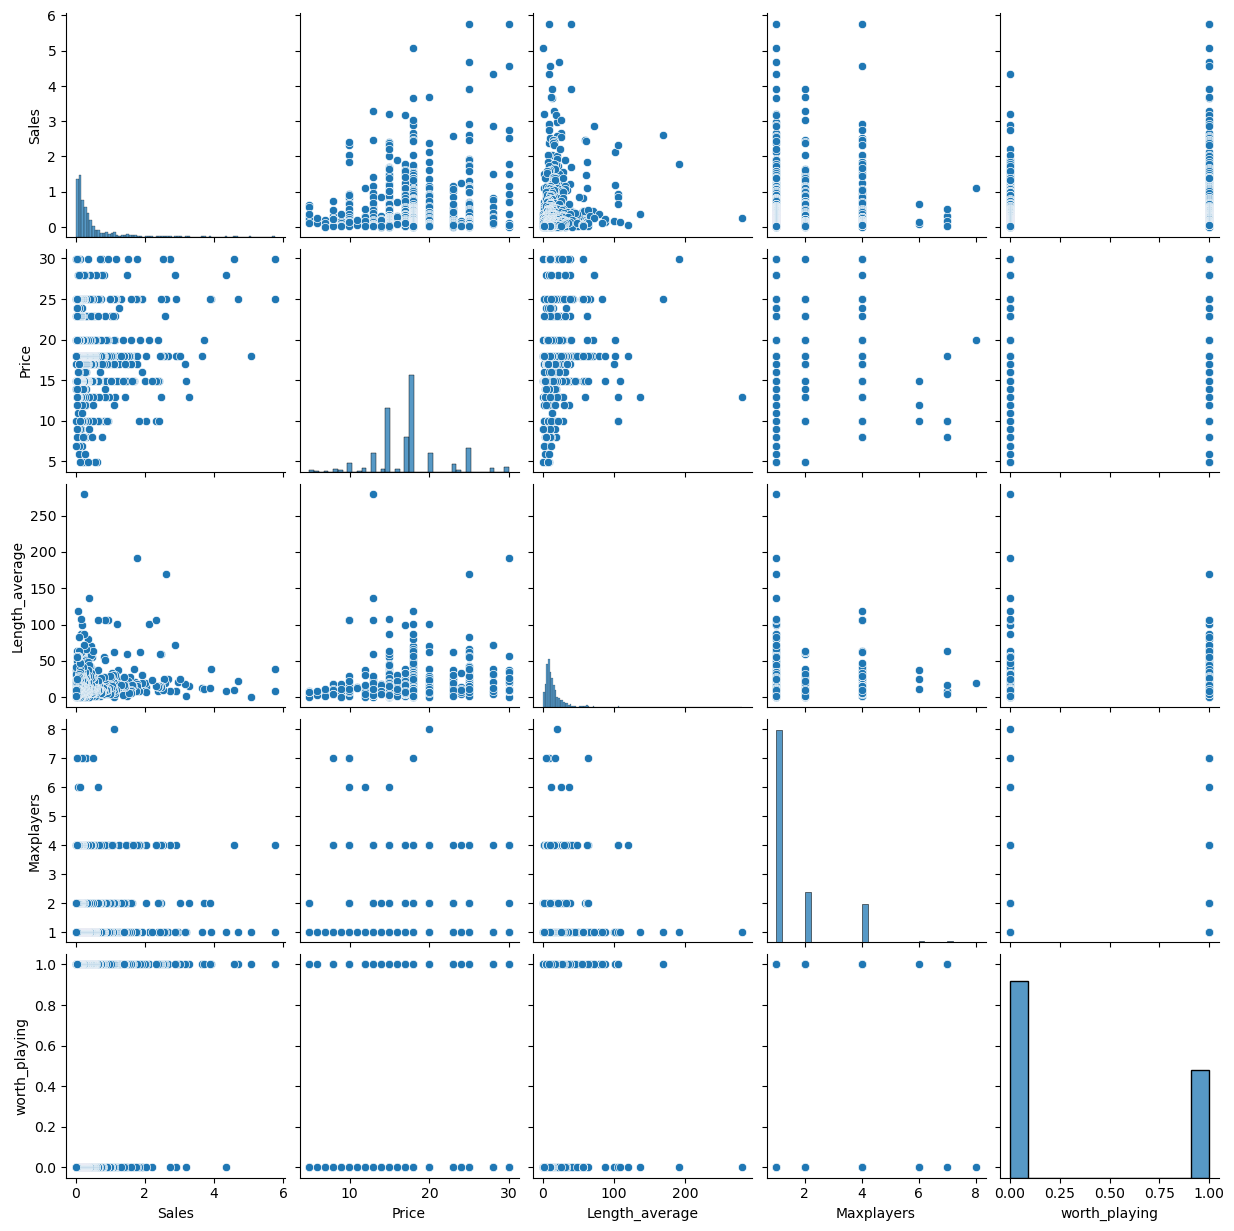

In [39]:
sns.pairplot(ds)

#### Multicollinearity

There does not seem to be a strong presence of multicollinerity and this is because there is no high correlation between two numerical explanatory variables. This is decided by the treshold of 0.7. By not having an issue with multicollinearity, we will not have to worry about the misinterpretation of slopes.

In [40]:
ds[["Sales","Price","Length_average","Maxplayers"]].corr()
#no strong correlation

,Sales,Price,Length_average,Maxplayers
Sales,1.000000,0.197818,0.116459,0.111313
Price,0.197818,1.000000,0.145014,-0.055407
Length_average,0.116459,0.145014,1.000000,-0.001820
Maxplayers,0.111313,-0.055407,-0.001820,1.000000


#### Pair #one

For this numerical and categrical explnantory pair (sales and console), the sales slope change semi-drastically depending on what the console is. By that, we can conclude that is a notable interaction effect with these two variables on the response variable.The largest slope difference is between Ninendo DS and playstation 3 with a difference of 3.7452; although there is not a notable differnce for the majority of the consoles, there are still difference between other consoles which cause this interaction effect on the response variable.


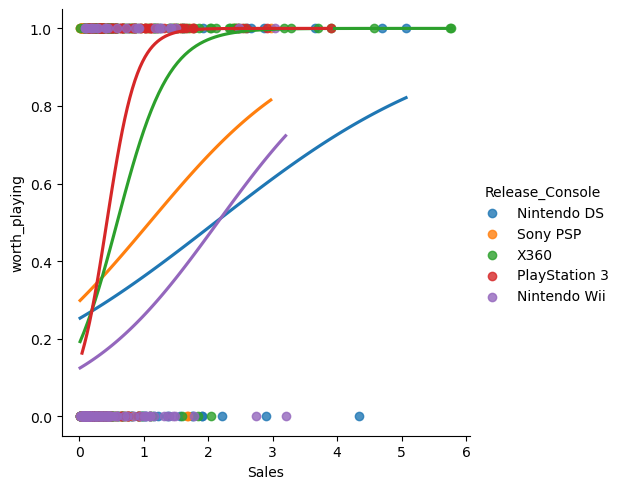

In [41]:
sns.lmplot(x="Sales", y= "worth_playing", hue="Release_Console", data = ds, logistic=True, ci=False)
plt.show()

In [42]:
log_mod1 = smf.logit("worth_playing~Sales+Release_Console", data = ds[ds.Release_Console=="Nintendo DS"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.593705
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.0875,0.161,-6.755,0.000,-1.403,-0.772
Sales,0.5155,0.196,2.636,0.008,0.132,0.899


In [43]:
log_mod2 = smf.logit("worth_playing~Sales+Release_Console", data = ds[ds.Release_Console=="Sony PSP"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.635802
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.8617,0.204,-4.229,0.000,-1.261,-0.462
Sales,0.7905,0.406,1.948,0.051,-0.005,1.586


In [44]:
log_mod3 = smf.logit("worth_playing~Sales+Release_Console", data = ds[ds.Release_Console=="X360"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.534425
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.4580,0.224,-6.496,0.000,-1.898,-1.018
Sales,2.4901,0.446,5.589,0.000,1.617,3.363


In [45]:
log_mod4 = smf.logit("worth_playing~Sales+Release_Console", data = ds[ds.Release_Console=="Nintendo Wii"]).fit()
display(log_mod4.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.460852
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.9571,0.308,-6.349,0.000,-2.561,-1.353
Sales,0.9118,0.342,2.663,0.008,0.241,1.583


In [46]:
log_mod5 = smf.logit("worth_playing~Sales+Release_Console", data = ds[ds.Release_Console=="PlayStation 3"]).fit()
display(log_mod5.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.509540
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.8073,0.353,-5.118,0.000,-2.499,-1.115
Sales,4.2607,0.870,4.896,0.000,2.555,5.966


#### Pair #two

For this numerical and categrical explnantory pair (price and console), the sales slope change semi-drastically depending on what the console is. By that, we can conclude that is a notable interaction effect with these two variables on the response variable.The largest slope difference is between x360 and Nintendo Ds with a difference of 0.0637; although there is not a notable differnce for the majority of the consoles, there are still difference between other consoles which casue this interaction effect on the response variable.


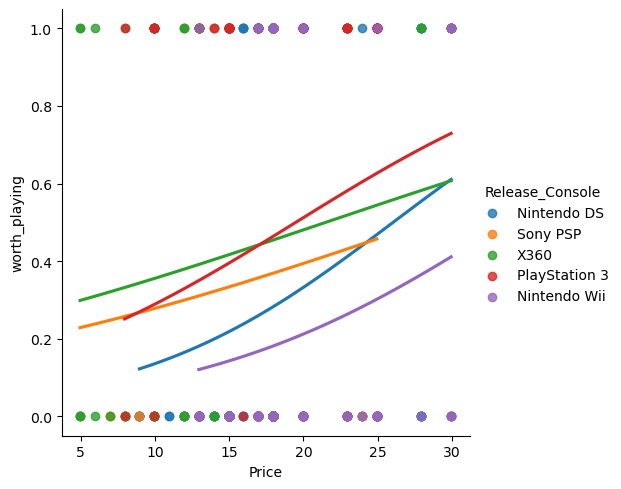

In [47]:
sns.lmplot(x="Price", y= "worth_playing", hue="Release_Console", data = ds, logistic=True, ci=False)
plt.show()

In [48]:
log_mod1 = smf.logit("worth_playing~Price+Release_Console", data = ds[ds.Release_Console=="Nintendo DS"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.580066
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.0035,0.592,-5.071,0.000,-4.164,-1.843
Price,0.1153,0.030,3.788,0.000,0.056,0.175


In [49]:
log_mod2 = smf.logit("worth_playing~Price+Release_Console", data = ds[ds.Release_Console=="Sony PSP"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.644501
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.4745,0.828,-1.780,0.075,-3.098,0.149
Price,0.0522,0.049,1.061,0.289,-0.044,0.149


In [50]:
log_mod3 = smf.logit("worth_playing~Price+Release_Console", data = ds[ds.Release_Console=="X360"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.678725
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.1089,0.541,-2.049,0.040,-2.170,-0.048
Price,0.0516,0.032,1.606,0.108,-0.011,0.115


In [51]:
log_mod4 = smf.logit("worth_playing~Price+Release_Console", data = ds[ds.Release_Console=="Nintendo Wii"]).fit()
display(log_mod4.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.477009
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-3.2264,1.054,-3.060,0.002,-5.293,-1.160
Price,0.0957,0.054,1.763,0.078,-0.011,0.202


In [52]:
log_mod5 = smf.logit("worth_playing~Price+Release_Console", data = ds[ds.Release_Console=="PlayStation 3"]).fit()
display(log_mod5.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.673228
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.8457,0.797,-2.316,0.021,-3.408,-0.284
Price,0.0947,0.042,2.245,0.025,0.012,0.177


#### Pair #three

For this numerical and categrical explnantory pair (Length average and console), the slope change semi-drastically depending on what the console is. By that, we can conclude that is a notable interaction effect with these two variables on the response variable.The largest slope difference is between song psp and Nintendo Ds with a difference of 0.0474; although there is not a notable differnce for the majority of the consoles, there are still difference between other consoles which casue this interaction effect on the response variable.


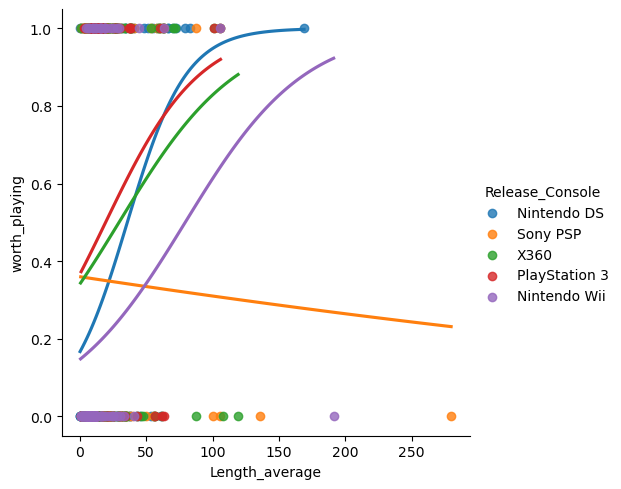

In [53]:
sns.lmplot(x="Length_average", y= "worth_playing", hue="Release_Console", data = ds, logistic=True, ci=False)
plt.show()

In [54]:
log_mod1 = smf.logit("worth_playing~Length_average+Release_Console", data = ds[ds.Release_Console=="Nintendo DS"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.557427
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.6207,0.218,-7.449,0.000,-2.047,-1.194
Length_average,0.0452,0.010,4.554,0.000,0.026,0.065


In [55]:
log_mod2 = smf.logit("worth_playing~Length_average+Release_Console", data = ds[ds.Release_Console=="Sony PSP"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.647419
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.5767,0.193,-2.983,0.003,-0.956,-0.198
Length_average,-0.0022,0.006,-0.355,0.723,-0.015,0.010


In [56]:
log_mod3 = smf.logit("worth_playing~Length_average+Release_Console", data = ds[ds.Release_Console=="X360"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.666253
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.6613,0.193,-3.426,0.001,-1.040,-0.283
Length_average,0.0223,0.008,2.701,0.007,0.006,0.039


In [57]:
log_mod4 = smf.logit("worth_playing~Length_average+Release_Console", data = ds[ds.Release_Console=="Nintendo Wii"]).fit()
display(log_mod4.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.471353
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.7657,0.286,-6.167,0.000,-2.327,-1.205
Length_average,0.0222,0.013,1.749,0.080,-0.003,0.047


In [58]:
log_mod5 = smf.logit("worth_playing~Length_average+Release_Console", data = ds[ds.Release_Console=="PlayStation 3"]).fit()
display(log_mod5.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.672724
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.5503,0.268,-2.055,0.040,-1.075,-0.025
Length_average,0.0282,0.014,2.082,0.037,0.002,0.055


#### Pair #four

For this numerical and categrical explnantory pair (Maxplayer and console), the sales slope change semi-drastically depending on what the console is. By that, we can conclude that is a notable interaction effect with these two variables on the response variable.The largest slope difference is between Nintendo Wii and Nintendo Ds with a difference of 1.7843; although there is not a notable differnce for the majority of the consoles, there are still difference between other consoles which casue this interaction effect on the response variable.


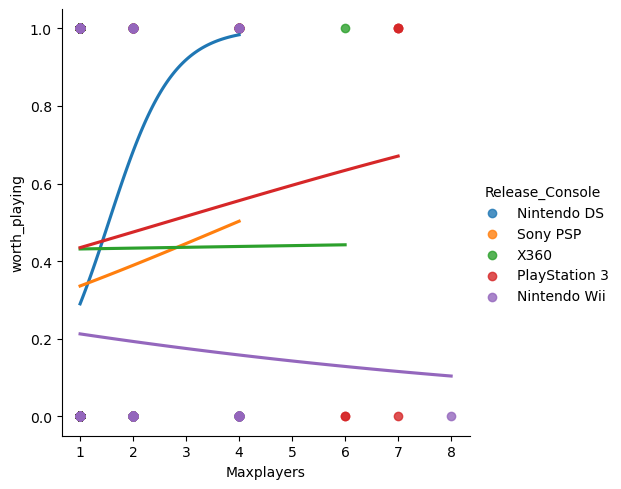

In [59]:
sns.lmplot(x="Maxplayers", y= "worth_playing", hue="Release_Console", data = ds, logistic=True, ci=False)
plt.show()

In [60]:
log_mod1 = smf.logit("worth_playing~Maxplayers+Release_Console", data = ds[ds.Release_Console=="Nintendo DS"]).fit()
display(log_mod1.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.600412
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.5591,1.151,-2.224,0.026,-4.814,-0.304
Maxplayers,1.6635,1.128,1.474,0.140,-0.548,3.875


In [61]:
log_mod2 = smf.logit("worth_playing~Maxplayers+Release_Console", data = ds[ds.Release_Console=="Sony PSP"]).fit()
display(log_mod2.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.643851
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.9122,0.299,-3.054,0.002,-1.498,-0.327
Maxplayers,0.2310,0.196,1.180,0.238,-0.153,0.615


In [62]:
log_mod3 = smf.logit("worth_playing~Maxplayers+Release_Console", data = ds[ds.Release_Console=="X360"]).fit()
display(log_mod3.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.684219
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.2848,0.248,-1.148,0.251,-0.771,0.201
Maxplayers,0.0087,0.112,0.078,0.938,-0.210,0.228


In [63]:
log_mod4 = smf.logit("worth_playing~Maxplayers+Release_Console", data = ds[ds.Release_Console=="Nintendo Wii"]).fit()
display(log_mod4.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.486094
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-1.1891,0.417,-2.850,0.004,-2.007,-0.371
Maxplayers,-0.1208,0.175,-0.691,0.490,-0.463,0.222


In [64]:
log_mod5 = smf.logit("worth_playing~Maxplayers+Release_Console", data = ds[ds.Release_Console=="PlayStation 3"]).fit()
display(log_mod5.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.685169
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4246,0.290,-1.462,0.144,-0.994,0.145
Maxplayers,0.1624,0.118,1.372,0.170,-0.070,0.394


The initial analysis has uncovered some intriguing insights into the video game industry. Our investigation has highlighted important relationships between various factors and their impact on a game's appeal. By incorporating interaction terms, the logistic regression model offered a detailed view of these dynamics. The significance of the model's coefficients suggests that certain variables play a crucial role in determining whether a game is worth playing.

One of the striking findings was the impact of Maxplayer and Sales on whether the game is worth playing. This suggests a complex and multifaceted decision-making process behind a game's development and marketing strategy, possibly reflecting the evolving consumer preferences and technological advancements in the gaming industry.


The categorical explanatory variable Console and and the numerical variable Sales has the strongest relationship and association with the response variable Worth playing. In the scatterplot, we see that the slopes varies, indicating that the specific Console and Sales plays a role if a game is worth playing or not.


The length average had the weakest relationships with our response variable worth playing. In the scatterplot, we see that most even wth most of the slopes differ from each other, the largest slope difference is not as high as the others, indicating that regardless of how long a player plays the game does not have much impact if the game is worth playing or not. This could potentially weaken our end results. 



## 5. Model Data Preprocessing

We selected the essential columns to construct the features matrix X, which includes 'maxplayer', 'sales', 'price', 'console', and 'length average'. The target array y was formed using the binary variable 'worth playing', which identifies whether a game is deemed worth playing.

To ensure uniform contribution of each feature in our regression analysis, the numerical explanatory variables were standardized. This step is crucial, especially for models like logistic regression that rely on distance measures.


We converted categorical explanatory variables into indicator (dummy) variables. This conversion is vital for logistic regression, which requires numerical inputs. The process included retaining all categories of the original variables to avoid loss of information.

A comprehensive data transformation pipeline was set up, integrating both the scaling of numerical variables and the encoding of categorical ones. This pipeline ensures that the dataset is properly formatted for subsequent model training and evaluation.

In [65]:
X=ds.drop(['worth_playing'], axis=1)
X.head()

,Sales,Price,Length_average,Maxplayers,Release_Console
0,4.69,24.95,22.716667,1,Nintendo DS
1,0.56,14.95,10.100000,1,Sony PSP
2,0.54,22.95,4.566667,2,Nintendo DS
4,0.45,14.95,13.250000,1,Nintendo DS
5,0.41,12.95,21.933333,1,Nintendo DS


In [66]:
Y=ds["worth_playing"]
Y.head()

0    1
1    1
2    1
4    0
5    0
Name: worth_playing, dtype: int64

In [67]:
X_data_types=X.dtypes
X_num_cols = X_data_types[(X_data_types=="float64")|(X_data_types=="int64")].index
X_num_cols

Index(['Sales', 'Price', 'Length_average', 'Maxplayers'], dtype='object')

In [68]:
scaler_full = StandardScaler()
scaled_expl_vars = scaler_full.fit_transform(X[X_num_cols])
X_num = pd.DataFrame(scaled_expl_vars, columns=X_num_cols)
X_num.head()

,Sales,Price,Length_average,Maxplayers
0,6.154740,1.809493,0.311413,-0.534041
1,0.134966,-0.587335,-0.322504,-0.534041
2,0.105815,1.330127,-0.600523,0.367623
3,-0.025367,-0.587335,-0.164234,-0.534041
4,-0.083670,-1.066701,0.272055,-0.534041


In [69]:
X_cat = X[["Release_Console"]]
X_dummies = pd.get_dummies(X_cat, drop_first =True, dtype=int)
X_dummies.reset_index(drop=True, inplace=True)


In [70]:
X=pd.concat([X_num,X_dummies], axis=1)
X.head()


,Sales,Price,Length_average,Maxplayers,Release_Console_Nintendo Wii,Release_Console_PlayStation 3,Release_Console_Sony PSP,Release_Console_X360
0,6.154740,1.809493,0.311413,-0.534041,0,0,0,0
1,0.134966,-0.587335,-0.322504,-0.534041,0,0,1,0
2,0.105815,1.330127,-0.600523,0.367623,0,0,0,0
3,-0.025367,-0.587335,-0.164234,-0.534041,0,0,0,0
4,-0.083670,-1.066701,0.272055,-0.534041,0,0,0,0


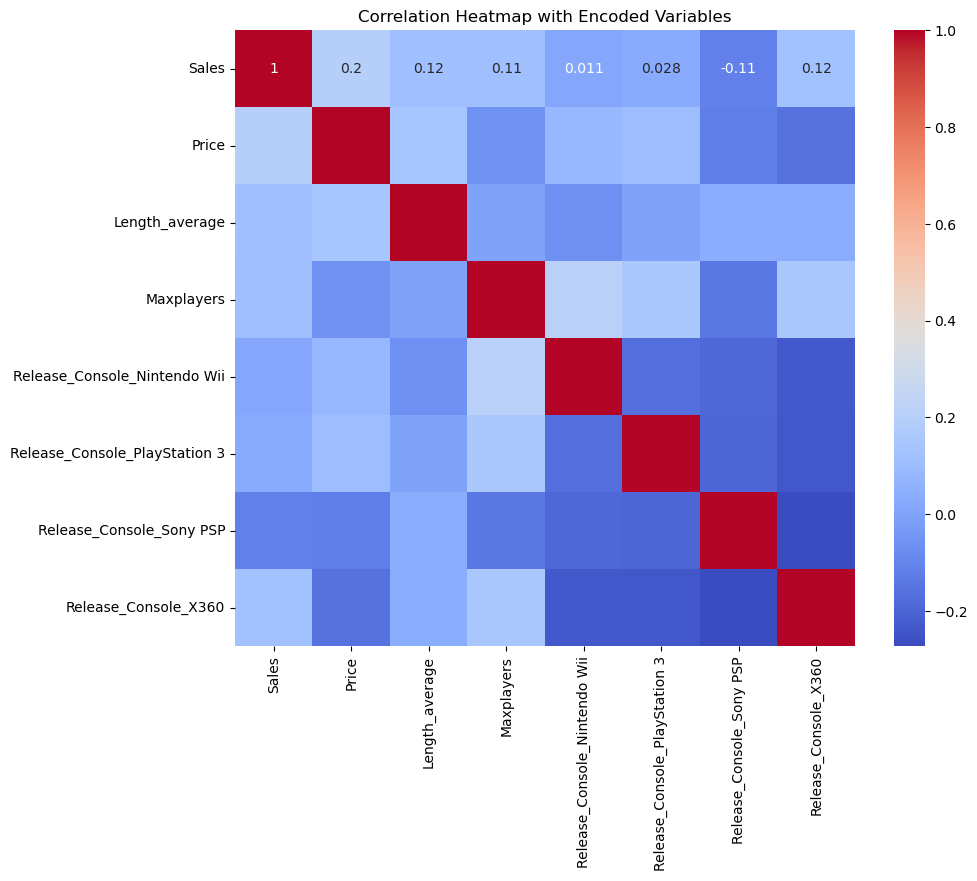

In [71]:
X_encoded = pd.get_dummies(X)

corr_matrix = X_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Variables')
plt.show()

## 6. Feature Selection with k-Fold Cross-Validation

We chose the LASSO Logistic Regression Model for feature selection and implemented k-fold cross-validation, mainly due to our familiarity with this approach. This familiarity boosts our confidence in achieving accurate results and minimizing errors. Additionally, LASSO is straightforward to comprehend: it zeroes out coefficients of explanatory variables that are either overfitting or underperforming in terms of predictive power. This feature helps us concentrate on the variables that truly enhance the model’s predictive accuracy, as reflected in the highest AUC (Area Under the Curve) score.

In [72]:
cross_val = KFold(n_splits=5, shuffle=True, random_state=207)
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [73]:
#lasso
auc_list = []
for lam in np.arange(0.05, 1, 0.005):  
    log_reg_mod = LogisticRegression(C=lam, penalty='l1', solver='liblinear', max_iter=1000)
    
    test_fold_auc = cross_val_score(log_reg_mod, X, Y, cv=cross_val, scoring='roc_auc')
    
    auc_list.append([lam, test_fold_auc.mean(), test_fold_auc.std()])

df_cross_val = pd.DataFrame(auc_list, columns=['lambda', 'mean_test_auc', 'std_test_auc'])
df_cross_val

,lambda,mean_test_auc,std_test_auc
0,0.050,0.728188,0.021080
1,0.055,0.731037,0.020181
2,0.060,0.734562,0.018662
3,0.065,0.736983,0.020068
4,0.070,0.737661,0.019854
...,...,...,...
185,0.975,0.718253,0.014267
186,0.980,0.718229,0.014236
187,0.985,0.718108,0.014294
188,0.990,0.718084,0.014327


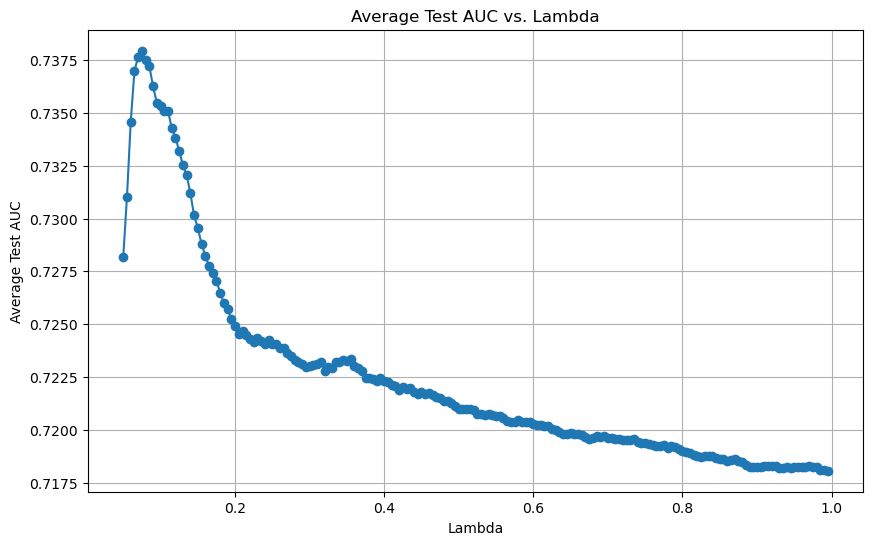

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(df_cross_val['lambda'], df_cross_val['mean_test_auc'], marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average Test AUC')
plt.title('Average Test AUC vs. Lambda')
plt.grid(True)
plt.show()

In [75]:
df_best=df_cross_val.nlargest(1,"mean_test_auc")
df_best

,lambda,mean_test_auc,std_test_auc
5,0.075,0.737943,0.019436


## 7. Best Model Discussion

In [76]:
df_cross_val.nlargest(1,"mean_test_auc")

,lambda,mean_test_auc,std_test_auc
5,0.075,0.737943,0.019436


In [77]:
log_best = LogisticRegression(C=1/0.075, penalty='l1', solver='liblinear', max_iter=1000)
log_best

LogisticRegression(C=13.333333333333334, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)
log_best.fit(X_train,y_train)

LogisticRegression(C=13.333333333333334, max_iter=1000, penalty='l1',
                   solver='liblinear')

In [79]:
df_coef=pd.DataFrame(log_best.coef_.T,columns=["Slope"],index=X_train.columns)
df_coef.loc["Intercept"]=log_best.intercept_[0]
df_coef

,Slope
Sales,0.792875
Price,0.045979
Length_average,0.470181
Maxplayers,0.003187
Release_Console_Nintendo Wii,-0.859492
Release_Console_PlayStation 3,0.663119
Release_Console_Sony PSP,0.335297
Release_Console_X360,0.391263
Intercept,-0.681747


## Multicollineartiy

In [80]:
X_dropp_zero=X_train.drop("Release_Console_PlayStation 3",axis=1)
X_dropp_zero.corr()

,Sales,Price,Length_average,Maxplayers,Release_Console_Nintendo Wii,Release_Console_Sony PSP,Release_Console_X360
Sales,1.000000,0.228142,0.132930,0.132963,0.005483,-0.124787,0.114326
Price,0.228142,1.000000,0.218808,-0.048336,0.078353,-0.150624,-0.164794
Length_average,0.132930,0.218808,1.000000,-0.010980,-0.060213,0.001699,0.003696
Maxplayers,0.132963,-0.048336,-0.010980,1.000000,0.245587,-0.130926,0.140442
Release_Console_Nintendo Wii,0.005483,0.078353,-0.060213,0.245587,1.000000,-0.187598,-0.230977
Release_Console_Sony PSP,-0.124787,-0.150624,0.001699,-0.130926,-0.187598,1.000000,-0.262722
Release_Console_X360,0.114326,-0.164794,0.003696,0.140442,-0.230977,-0.262722,1.000000


In [81]:

phat_test = log_best.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_true=y_test,y_score=phat_test)
auc = roc_auc_score(y_true=y_test,y_score=phat_test)
auc

0.7467110835074247

In [82]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

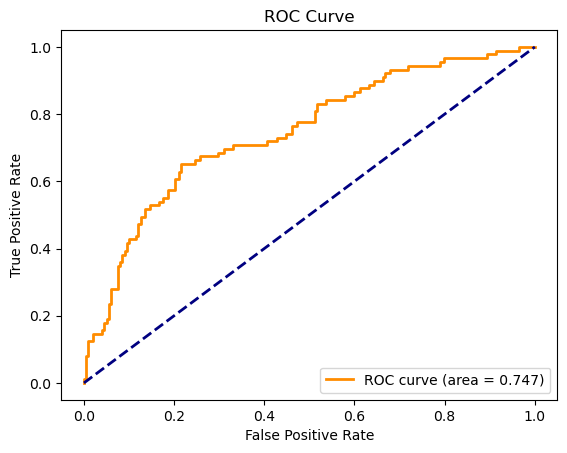

In [83]:
plot_roc(fprs, tprs, auc)

In [84]:
threshold_optimal = thresholds[np.argmax(tprs - fprs)]
threshold_optimal

0.38082344681246966

In [85]:
fpr_optimal=fprs[np.argmax(tprs - fprs)]
fpr_optimal

0.21608040201005024

In [86]:
tprs=tprs[np.argmax(tprs - fprs)]
tprs

0.651685393258427

Predicted Probability of a Game Considered As Worth Playing:

The logistic regression equation for the predicted probability ($\hat{P}$) of a game featuring multiplayer mode is given by:

\begin{align*}
\hat{P}(\text{worthplaying}=1) = & \; -0.654140 \\
& + 0.788592 \times \text{Sales} \\
& + 0.040367 \times \text{Price} \\
& + 0.466936 \times \text{Length\_average} \\
& + 0.002964 \times \text{Maxplayers} \\
& - 0.859198 \times \text{Release\_Console\_Nintendo\_Wii} \\
& + 0.622952 \times \text{Release\_Console\_PlayStation3} \\
& + 0.292691 \times \text{Release\_Console\_Sony\_PSP} \\
& + 0.352923 \times \text{Release\_Console\_X360}
\end{align*}



This equation represents the log-odds of a is worth playing, which can be converted to a probability via the logistic function.

**Slope Interpretations**

We are able to interpret the slopes from our analysis since we scaled the explanatory variables-- we can use slope magnitudes as a way to value them and compare how powerful they are to the model. One thing that sticks out no variable has a strength of over 1. 

After LASSO regulatization, we can conclude Release console and whether the game is by Nintendo wii has the most predictive power in predicting if a video game is worth playing or not because it has the largest slope magnitude after LASSO regulatization. 

**Multicollinearity**

We assessed multicollinearity, which can impact coefficient estimates and model interpretability, using a correlation matrix and Variance Inflation Factor (VIF) calculations. The correlation matrix revealed no pair of variables with a correlation above the 0.7 threshold, indicating low inter-variable dependence. VIF values for all predictors were under the conservative threshold of 5, suggesting insignificant multicollinearity. This confirms the reliability of our logistic regression coefficients and the model’s predictive stability. Hence, we proceed with our analysis, assured of the interpretability and validity of our model’s predictors.

***Best Predictive Probability Threshold***

To ensure our model meets the practical requirements of game developers and marketers, we established an optimal predictive probability threshold that effectively balances the trade-off between sensitivity (True Positive Rate, or TPR) and specificity (False Positive Rate, or FPR). This balance is essential, especially in scenarios where the implications of false positives differ from those of false negatives.

Through our ROC curve analysis, we determined an optimal threshold of approximately 0.6556603773584906. At this level, the model achieves a TPR of about 65.56%, efficiently identifying games that are worth playing most of the time. The FPR stands at around 21.1%, representing the rate at which games not worth playing are incorrectly classified as worth playing.

In this research context, prioritizing a high TPR is beneficial because it ensures that most games of interest to our stakeholders are correctly flagged as worth playing. While the FPR is not insignificant, it is considered an acceptable trade-off to ensure a substantial capture of worth playing games. This threshold is particularly advantageous for developers and marketers who aim to maximize engagement, minimizing the risk of overlooking potential hits due to conservative predictions.

## 8. Additional Analysis/Insight

In addition to our primary analysis,we used the k-means clustering to discover inherent groupings within our video game dataset, utilizing this unsupervised learning method to segment the market into five distinct clusters. The use of the Elbow Method helped us identify an optimal k-value, indicating a natural division in the data that highlights common characteristics, possibly reflecting different player preferences, or other industry trends.

The cluster distribution offers an intriguing insight: some clusters are more densely populated, likely representing prevailing gaming trends, while others are less filled, pointing towards niche markets or emergent genres. This additional layer of analysis is in line with our objective to customize game features for specific market segments, offering strategic insights that could guide targeted development efforts to boost player involvement in multiplayer gaming scenarios.

In [87]:
sns.barplot(pd.Series(clusters).value_counts())

NameError: name 'clusters' is not defined

C:\Users\19242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\19242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

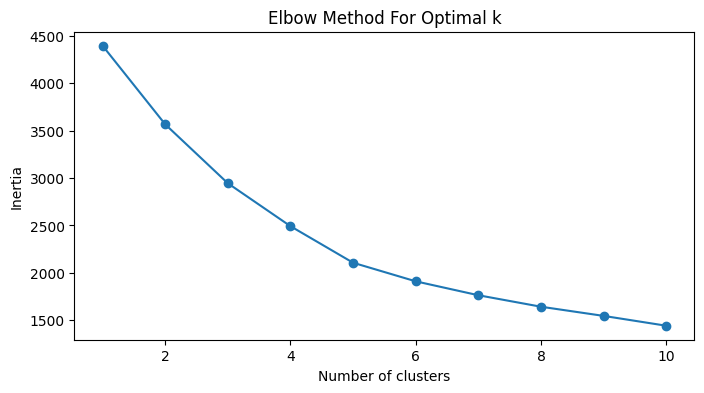

C:\Users\19242\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


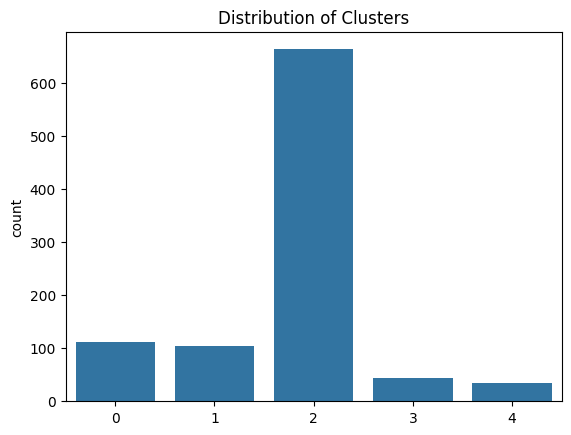

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Fit k-means with the optimal number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_encoded)
X_kmeans = ds.copy()
X_kmeans['cluster'] = kmeans.predict(X_encoded)
sns.barplot(pd.Series(clusters).value_counts())
plt.title('Distribution of Clusters')
plt.show()


In [ ]:
X_kmeans

,Sales,Price,Length_average,Maxplayers,Release_Console,worth_playing,cluster
0,4.69,24.95,22.716667,1,Nintendo DS,1,4
1,0.56,14.95,10.100000,1,Sony PSP,1,2
2,0.54,22.95,4.566667,2,Nintendo DS,1,1
4,0.45,14.95,13.250000,1,Nintendo DS,0,2
5,0.41,12.95,21.933333,1,Nintendo DS,0,2
...,...,...,...,...,...,...,...
1205,0.03,14.95,3.333333,1,Nintendo DS,0,2
1206,0.03,12.95,10.666667,1,Nintendo DS,0,2
1207,0.03,17.95,10.083333,1,Nintendo DS,0,2
1210,0.02,17.95,10.083333,2,Nintendo Wii,0,2


describe postiions of all the clusters with differnt x,y and hue

<Axes: xlabel='Sales', ylabel='Price'>

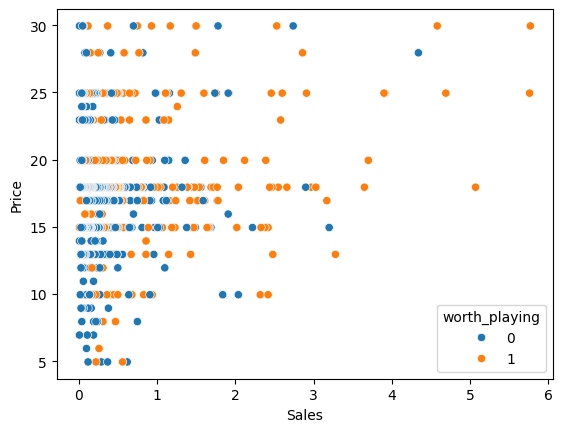

In [ ]:
sns.scatterplot(data=X_kmeans, x='Sales', y='Price', hue='worth_playing')

<Axes: xlabel='Sales', ylabel='Price'>

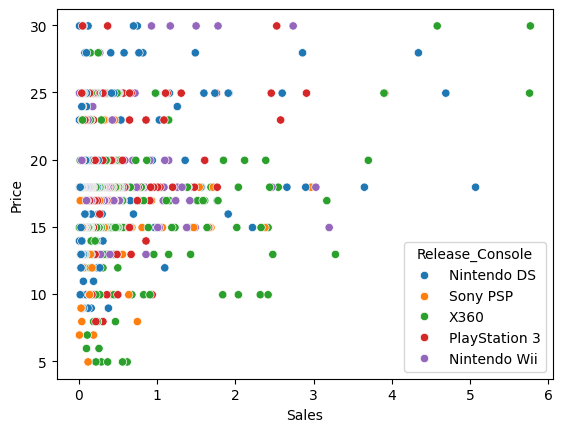

In [ ]:
sns.scatterplot(data=X_kmeans, x='Sales', y='Price', hue='Release_Console')

<Axes: xlabel='Sales', ylabel='Price'>

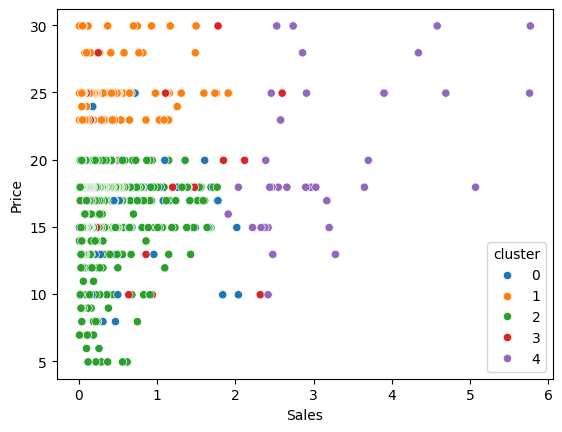

In [ ]:
sns.scatterplot(data=X_kmeans, x='Sales', y='Price', hue='cluster', palette="tab10")

## 9. Conclusion

Our investigation using an L1 regularization logistic regression model has yielded an impressive AUC of 0.381, this demonstrates the model's strong ability to predict whether a game is worth playing. This result makes this model a reliable tool for industry stakeholders while providing key insights that can guide strategic decisions.

However, there is room for further exploration and improvements. We think our project at identifung the best model was limited by the range of techniques we applied. Future work could explore a broader array of methods, such as ensemble models or deep learning, which might uncover even better performance metrics.

The low VIF scores confirm that there is minimal multicollinearity among the variables, suggesting that each contributes uniquely to the predictions. The optimal threshold derived from the ROC curve is about 0.381, striking a good balance between sensitivity and specificity in predicting the game's worthiness.

Given the model’s  performance and our thorough analysis, we believe it provides valuable predictive insights. However, we are aware that no model is without its flaws. Moving forward, we hope to improve our work, possibly by integrating real-time data and examining temporal dynamics, to keep pace with the forver evolving gaming industry.

One idea for future work is to use a video game datatset that are from recent years. This dataset is collected long ago from 2004-2008. There are many more games launched in recent years. To create a more useful data that predict whether a game is worth playing in new dataset, we would need to use a more recent dataset. Technology has been advancing, and gaming now comapared to the 2000s is relatively different. Due to the old dataset, it could be lacking current trends. For the purpose of our research, people now may not enjoy the games that has been launched way back in the 2000s as much, so they may give the game a relatively low score.

## References

Yoon, A. (2014, April 23). Higher Metacritic scores impact game sales positively. Shacknews. https://www.shacknews.com/article/84203/higher-metacritic-scores-impact-game-sales-positively 

Game development cost breakdown: What to expect. RSS. (n.d.). https://www.sonamine.com/blog/game-development-cost-breakdown-what-to-expect#:~:text=The%20average%20development%20cost%20for,it%20takes%20to%20make%20it. 

